In [2]:
!pip install opendatasets --quiet
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rakeshsuru16
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 436MB/s]

In [4]:
!pip install torch

In [5]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [7]:
data = pd.read_csv("/content/rice-type-classification/riceClassification.csv")

In [8]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [9]:
data.drop(columns = {"id"}, axis = 1, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [11]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [12]:
data.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0
AspectRation,0


In [13]:
data["Class"].unique()

array([1, 0])

In [14]:
data["Class"].value_counts()

,count
Class,
1,9985
0,8200


In [15]:
original = data.copy()

In [16]:
for col in data.columns:
  maximum = data[col].abs().max()
  data[col] = data[col]/maximum

In [17]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [18]:
X = data.drop(columns = {"Class"}, axis = 1)
y = data["Class"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

In [20]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 16)

In [21]:
X_train.shape, X_test.shape, X_val.shape

((12729, 10), (2728, 10), (2728, 10))

In [25]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X.values, dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y.values, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.Y[idx]

In [26]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [27]:
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle = True)
val_dataloader = DataLoader(validation_data, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(testing_data, batch_size = 32, shuffle = True)

In [29]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], 10)
    self.hidden_layer = nn.Linear(10, 5)
    self.output_layer = nn.Linear(5, 1)
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()

  def forward(self, X):
    X = self.input_layer(X)
    X = self.relu(X)
    X = self.hidden_layer(X)
    X = self.relu(X)
    X = self.output_layer(X)
    X = self.sigmoid(X)
    return X

model = MyModel().to(device)

In [30]:
summary(model, (X.shape[1], ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
              ReLU-2                   [-1, 10]               0
            Linear-3                    [-1, 5]              55
              ReLU-4                    [-1, 5]               0
            Linear-5                    [-1, 1]               6
           Sigmoid-6                    [-1, 1]               0
Total params: 171
Trainable params: 171
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [31]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 0.001)

In [33]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

for epoch in range(10):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    X, y = data

    prediction = model(X).squeeze( )
    loss = criterion(prediction, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss_train += loss.item()
    total_acc_train += accuracy_score(y.cpu().detach().numpy(), np.round(prediction.cpu().detach().numpy()))

  with torch.no_grad():
    for data in val_dataloader:
      X, y = data

      prediction = model(X).squeeze(1)
      loss = criterion(prediction, y)

      total_loss_val += loss.item()
      total_acc_val += accuracy_score(y.cpu().detach().numpy(), np.round(prediction.cpu().detach().numpy()))

  total_loss_train_plot.append(round(total_loss_train/len(train_dataloader), 4))
  total_loss_val_plot.append(round(total_loss_val/len(val_dataloader), 4))
  total_acc_train_plot.append(round(total_acc_train/len(train_dataloader), 4))
  total_acc_val_plot.append(round(total_acc_val/len(val_dataloader), 4))

  print(f"Epoch: {epoch+1}")
  print(f"Train Loss: {total_loss_train_plot[-1]} | Train Accuracy: {total_acc_train_plot[-1] * 100}")
  print(f"Val Loss: {total_loss_val_plot[-1]} | Val Accuracy: {total_acc_val_plot[-1] * 100}")
  print()

Epoch: 1
Train Loss: 0.0628 | Train Accuracy: 98.58
Val Loss: 0.0511 | Val Accuracy: 98.87

Epoch: 2
Train Loss: 0.0589 | Train Accuracy: 98.58
Val Loss: 0.0476 | Val Accuracy: 98.91

Epoch: 3
Train Loss: 0.056 | Train Accuracy: 98.57000000000001
Val Loss: 0.0452 | Val Accuracy: 98.87

Epoch: 4
Train Loss: 0.0538 | Train Accuracy: 98.49
Val Loss: 0.0426 | Val Accuracy: 98.91

Epoch: 5
Train Loss: 0.0521 | Train Accuracy: 98.56
Val Loss: 0.0404 | Val Accuracy: 98.87

Epoch: 6
Train Loss: 0.0508 | Train Accuracy: 98.52
Val Loss: 0.0394 | Val Accuracy: 98.87

Epoch: 7
Train Loss: 0.0493 | Train Accuracy: 98.54
Val Loss: 0.0428 | Val Accuracy: 98.66

Epoch: 8
Train Loss: 0.0479 | Train Accuracy: 98.55000000000001
Val Loss: 0.0404 | Val Accuracy: 98.8

Epoch: 9
Train Loss: 0.0477 | Train Accuracy: 98.48
Val Loss: 0.0392 | Val Accuracy: 98.83999999999999

Epoch: 10
Train Loss: 0.0468 | Train Accuracy: 98.56
Val Loss: 0.0356 | Val Accuracy: 98.87



In [34]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in test_dataloader:
    X, y = data

    prediction = model(X).squeeze(1)

    loss = criterion(prediction, y)

    total_loss_test += loss.item()
    total_acc_test += accuracy_score(y.cpu().detach().numpy(), np.round(prediction.cpu().detach().numpy()))

  print(f"Test Loss: {round(total_loss_test/len(test_dataloader), 4)} | Test Accuracy: {round(total_acc_test/len(test_dataloader), 4) * 100}")

Test Loss: 0.04 | Test Accuracy: 98.76


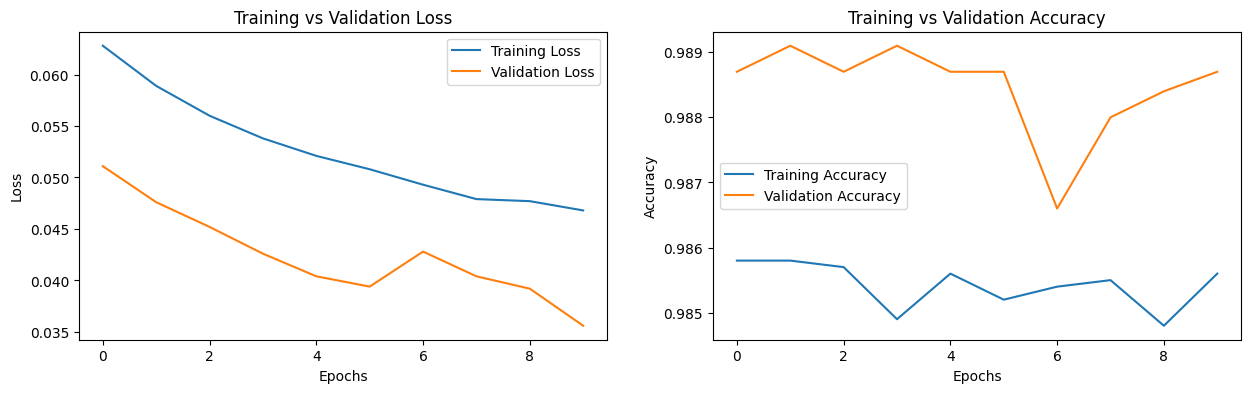

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

axes[0].plot(total_loss_train_plot, label = "Training Loss")
axes[0].plot(total_loss_val_plot, label = "Validation Loss")
axes[0].set_title("Training vs Validation Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(total_acc_train_plot, label = "Training Accuracy")
axes[1].plot(total_acc_val_plot, label = "Validation Accuracy")
axes[1].set_title("Training vs Validation Accuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.show()